In [1]:
!ls

drive  sample_data


In [4]:
%cd drive/MyDrive/Hackathon/HackUTD/

/content/drive/MyDrive/Hackathon/HackUTD


In [5]:
!ls

data  hydrate_formation_eda_v1.ipynb


In [6]:
import pandas as pd

# Load the dataset
file_path = './data/Bold_744H-10_31-11_07.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Time,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Inj Gas Valve Percent Open
0,10/31/2024 12:00:00 am,391.43520,375.0,27.17612
1,10/31/2024 12:14:00 am,402.52365,NaN,NaN
2,10/31/2024 12:30:00 am,380.72775,NaN,26.70198
3,10/31/2024 12:46:00 am,382.73955,NaN,NaN
4,10/31/2024 1:00:00 am,384.86595,375.0,26.70198


In [7]:
# Check for null values and data types
data.info()

# Check for duplicate rows
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Time                                677 non-null    object 
 1   Inj Gas Meter Volume Instantaneous  675 non-null    float64
 2   Inj Gas Meter Volume Setpoint       180 non-null    float64
 3   Inj Gas Valve Percent Open          314 non-null    float64
dtypes: float64(3), object(1)
memory usage: 21.3+ KB


0

In [8]:
# Display a statistical summary of the numerical columns
data.describe()

# Check the range of the Time column
data['Time'] = pd.to_datetime(data['Time'], errors='coerce')
data['Time'].describe()

<ipython-input-8-aff6ceb561e7>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'], errors='coerce')


,Time
count,677
mean,2024-11-03 19:56:52.289512448
min,2024-10-31 00:00:00
25%,2024-11-02 03:30:00
50%,2024-11-03 21:44:00
75%,2024-11-05 16:58:00
max,2024-11-07 11:30:00


In [9]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check the number of unique values in each column
unique_values = data.nunique()
print("\nUnique Values:\n", unique_values)


Missing Values:
 Time                                    0
Inj Gas Meter Volume Instantaneous      2
Inj Gas Meter Volume Setpoint         497
Inj Gas Valve Percent Open            363
dtype: int64

Unique Values:
 Time                                  677
Inj Gas Meter Volume Instantaneous    662
Inj Gas Meter Volume Setpoint           1
Inj Gas Valve Percent Open            179
dtype: int64


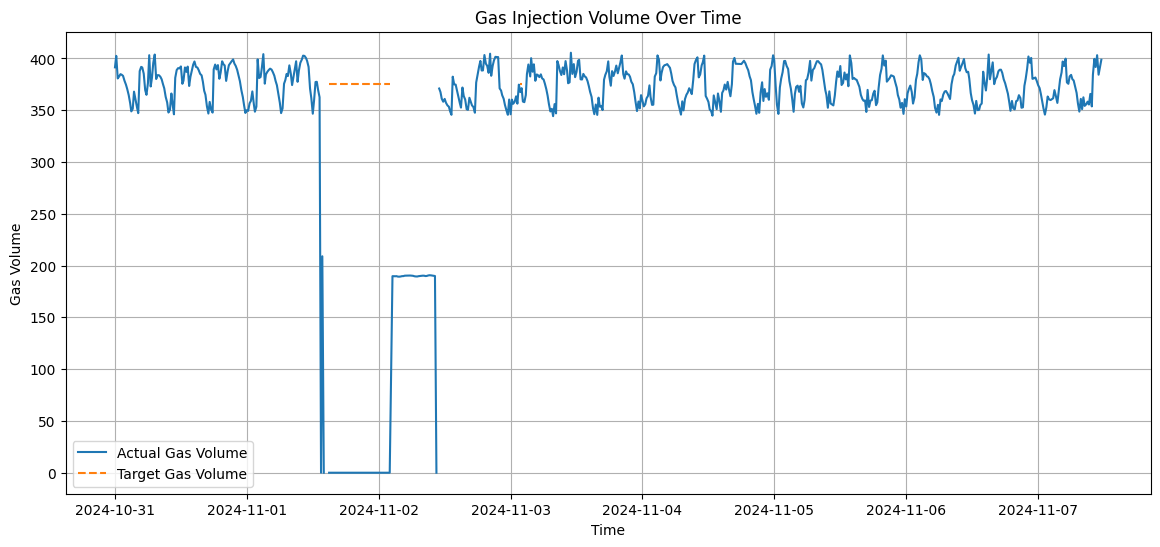

In [10]:
import matplotlib.pyplot as plt

# Plot the actual gas injection volume vs time
plt.figure(figsize=(14, 6))
plt.plot(data['Time'], data['Inj Gas Meter Volume Instantaneous'], label='Actual Gas Volume')
plt.plot(data['Time'], data['Inj Gas Meter Volume Setpoint'], label='Target Gas Volume', linestyle='--')
plt.title('Gas Injection Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Gas Volume')
plt.legend()
plt.grid()
plt.show()

In [11]:
# Compute the correlation matrix
correlation_matrix = data[['Inj Gas Meter Volume Instantaneous', 'Inj Gas Meter Volume Setpoint', 'Inj Gas Valve Percent Open']].corr()
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
                                     Inj Gas Meter Volume Instantaneous  \
Inj Gas Meter Volume Instantaneous                            1.000000   
Inj Gas Meter Volume Setpoint                                      NaN   
Inj Gas Valve Percent Open                                   -0.845577   

                                    Inj Gas Meter Volume Setpoint  \
Inj Gas Meter Volume Instantaneous                            NaN   
Inj Gas Meter Volume Setpoint                                 NaN   
Inj Gas Valve Percent Open                                    NaN   

                                    Inj Gas Valve Percent Open  
Inj Gas Meter Volume Instantaneous                   -0.845577  
Inj Gas Meter Volume Setpoint                              NaN  
Inj Gas Valve Percent Open                            1.000000  


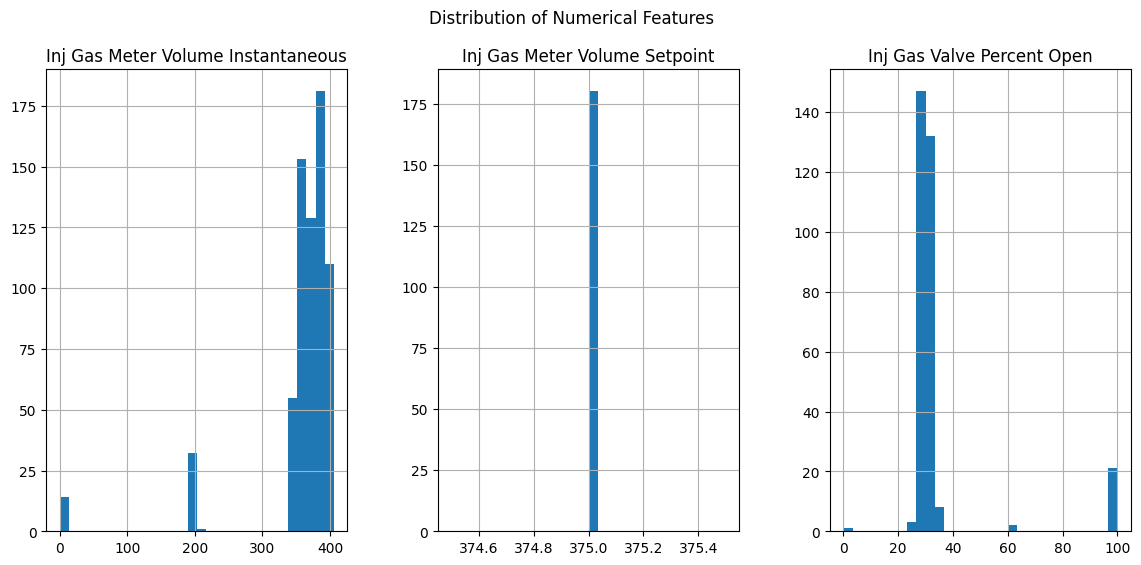

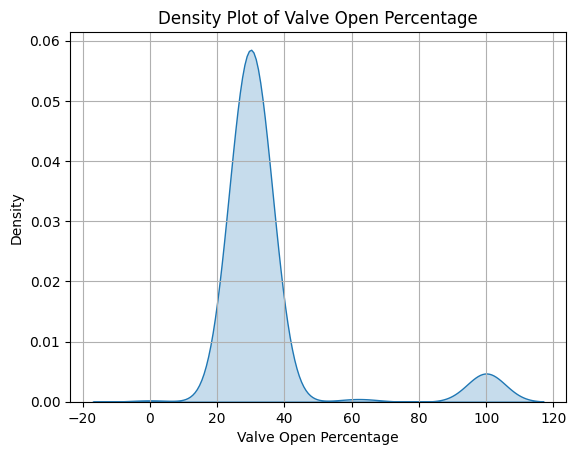

In [12]:
import seaborn as sns

# Plot histograms for numerical columns
data[['Inj Gas Meter Volume Instantaneous', 'Inj Gas Meter Volume Setpoint', 'Inj Gas Valve Percent Open']].hist(bins=30, figsize=(14, 6), layout=(1, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# KDE plot for Gas Valve Percent Open
sns.kdeplot(data['Inj Gas Valve Percent Open'], fill=True)
plt.title('Density Plot of Valve Open Percentage')
plt.xlabel('Valve Open Percentage')
plt.ylabel('Density')
plt.grid()
plt.show()


In [13]:
# Calculate the difference between actual and target gas volumes
data['Volume Difference'] = data['Inj Gas Meter Volume Setpoint'] - data['Inj Gas Meter Volume Instantaneous']

# Identify timestamps with high deviations
threshold = data['Volume Difference'].mean() + 2 * data['Volume Difference'].std()
potential_hydrate_events = data[data['Volume Difference'] > threshold]

print(f"Number of potential hydrate events: {len(potential_hydrate_events)}")
potential_hydrate_events[['Time', 'Inj Gas Meter Volume Instantaneous', 'Inj Gas Meter Volume Setpoint', 'Volume Difference']].head()


Number of potential hydrate events: 12


,Time,Inj Gas Meter Volume Instantaneous,Inj Gas Meter Volume Setpoint,Volume Difference
152,2024-11-01 14:00:00,0.0,375.0,375.0
154,2024-11-01 14:58:00,0.0,375.0,375.0
155,2024-11-01 16:00:00,0.0,375.0,375.0
156,2024-11-01 16:58:00,0.0,375.0,375.0
157,2024-11-01 18:00:00,0.0,375.0,375.0


<ipython-input-14-5d63f53598f9>:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data_resampled = data.resample('T').mean()  # Resampling by minute


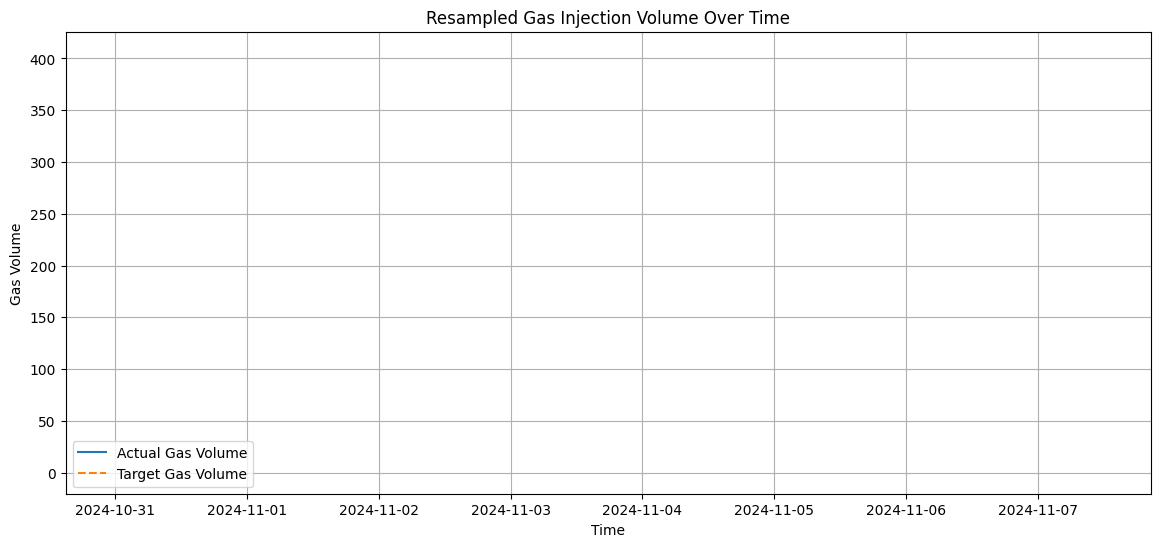

In [14]:
# Resample data by minute for smoother analysis
data.set_index('Time', inplace=True)
data_resampled = data.resample('T').mean()  # Resampling by minute
data_resampled.reset_index(inplace=True)

# Plot resampled data to observe trends
plt.figure(figsize=(14, 6))
plt.plot(data_resampled['Time'], data_resampled['Inj Gas Meter Volume Instantaneous'], label='Actual Gas Volume')
plt.plot(data_resampled['Time'], data_resampled['Inj Gas Meter Volume Setpoint'], label='Target Gas Volume', linestyle='--')
plt.title('Resampled Gas Injection Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Gas Volume')
plt.legend()
plt.grid()
plt.show()
